# HW 6: Logistic Regression

In this assignment, we will build a _logistic regression_ model to perform a classfication task and train it using the _gradient descent_ algorithm.

## Submission instruction
- Due by 11:59pm on **Nov. 14th, 2019**
- Complete this notebook and name it as "*CSCI3360\_HW6\_{your first name}.ipynb*".
- Do **not** use any other 3rd party libraries unless you are asked to do so.
- Do **not** _hardcode_ any data.
- Feel free to modify function prototype (i.e., you can add additional input parameters or remove existing ones based on your needs)
- Feel free to define your own functions if needed.
- Label your graphs.
- All the texts and labels in your graphs should be _legible_.

Let's start by importing required libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

%matplotlib inline

ModuleNotFoundError: No module named 'google.colab'

For this assignment, we will be using the telco customer churning dataset. You can dowload the dataset from [here](http://cobweb.cs.uga.edu/~jwlee/datasets/churn.csv).

### About the dataset
- The dataset contains missing values (whitespace).
- You will see 7043 observations, each of which has 21 features
- Our goal is to build a logistic regression model for predicting whether the customer will churn or not, i.e., the churn column. 
- There are three numerical features: tenure, MonthlyCharges, TotalCharges.
- All other features are categorical.

The following table describes the features in the dataset.

| Feature | Description |
|:-------:|:----------:|
|customerID | Customer ID |
| gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0)|
|Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No)|
| tenure | Number of months the customer has stayed with the company|
|PhoneService | Whether the customer has a phone service or not (Yes, No)|
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service)|
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No)|
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service)|
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service)|
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service)|
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service)|
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year)|
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No)| 
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) | 
| MonthlyCharges | The amount charged to the customer monthly| 
| TotalCharges | The total amount charged to the customer| 
| Churn | Whether the customer churned or not (Yes or No) | 



## Part 1. EDA

Before we build a logistic regression model on the data, let's try to get more insights on our dataset by performing EDA.

 
### Q1. (5 pts) Draw plots showing the distirubtion of values in numerical attributes (i.e., tenure, MonthlyCharges, and TotalCharges).
- Show the distribution by drawing histograms.
- Label them clearly (you may want to adjust the font size).
- Each graph should contain two histograms (one for Churn='Yes' and the other for Churn='No').
- For each graph, briefly describe your observations.


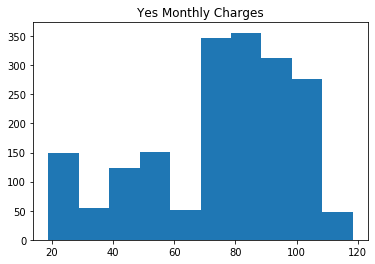

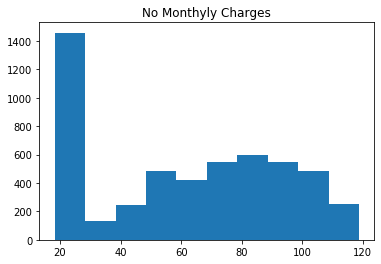

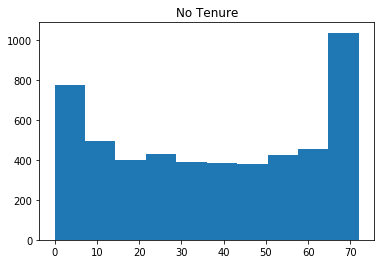

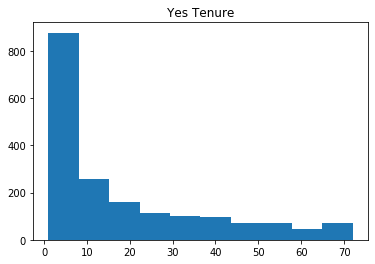

In [128]:

root_path = 'gdrive/My Drive/3360/churn.csv'
df = pd.read_csv(root_path)
t_Yes = []
t_No = []
tenure = df['tenure']
churn = df['Churn']
monthlyCharges = df['MonthlyCharges']
totalCharges = df['TotalCharges']
length = len(tenure)


m_Yes = []
m_No = []
length = len(monthlyCharges)
for num in range(length): 
    if churn[num] == "Yes":
        m_Yes.append(monthlyCharges[num])
    if churn[num] == "No":
        m_No.append(monthlyCharges[num])       
plt.hist(m_Yes)
plt.title("Yes Monthly Charges")
plt.show()
plt.hist(m_No)
plt.title("No Monthyly Charges")
plt.show()



for num in range(length):
    if churn[num] == "Yes":
        t_Yes.append(tenure[num])
    if churn[num] == "No":
        t_No.append(tenure[num])      
plt.hist(t_No)
plt.title("No Tenure")
plt.show()
plt.hist(t_Yes)
plt.title("Yes Tenure")
plt.show()


### Q2. (5 pts) Draw plots showing the distribution of values in categorical attributes.
- Show the distribution by drawing grouped bar charts
- Label them clearly (you may want to adjust the font size).
- Each graph should contain two histograms (one for Churn='Yes' and the other for Churn='No').

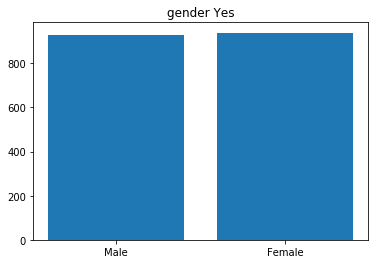

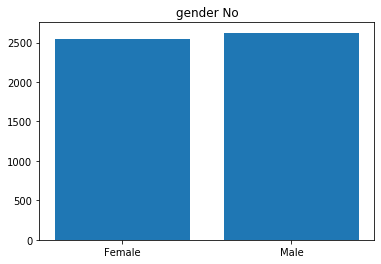

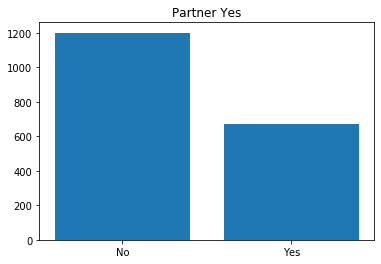

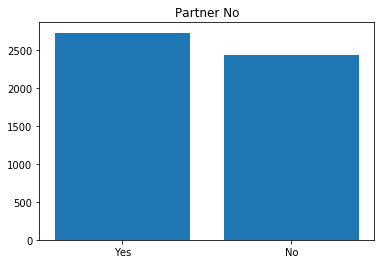

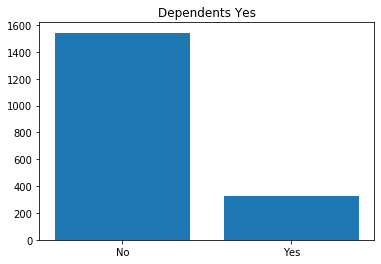

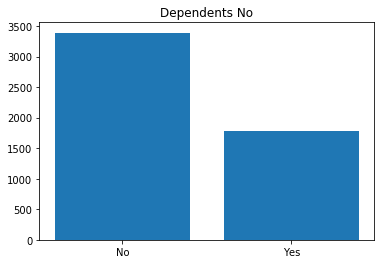

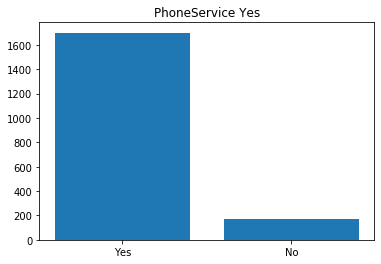

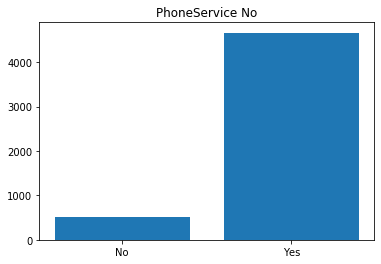

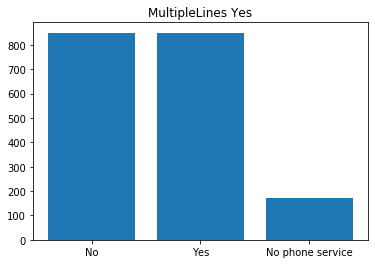

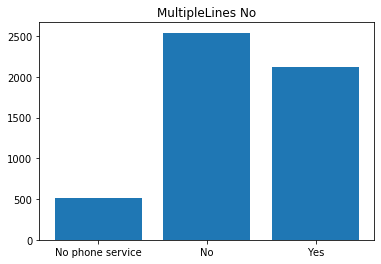

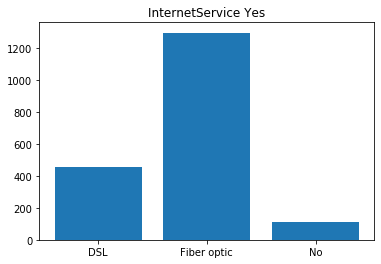

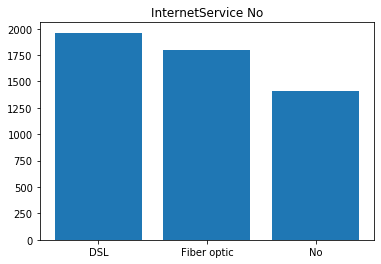

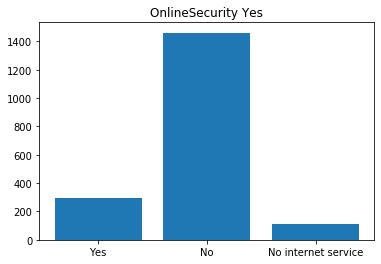

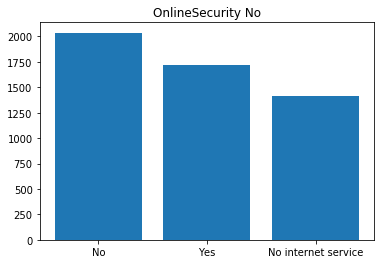

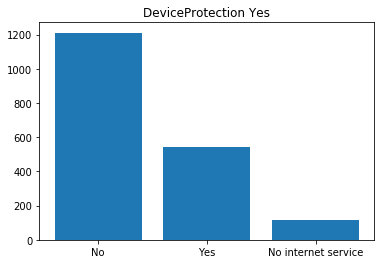

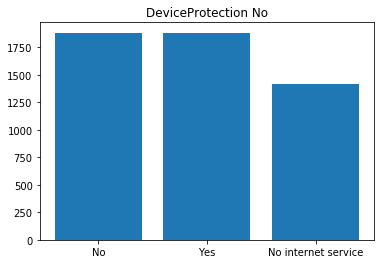

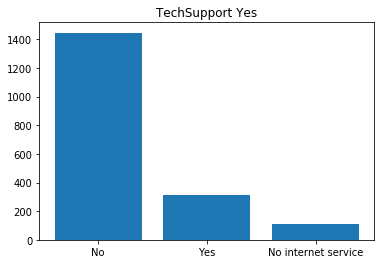

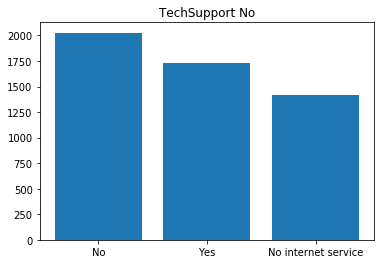

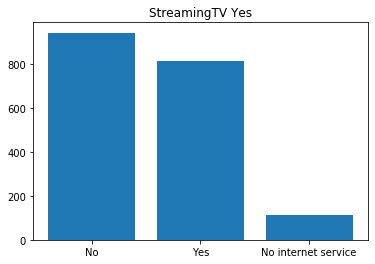

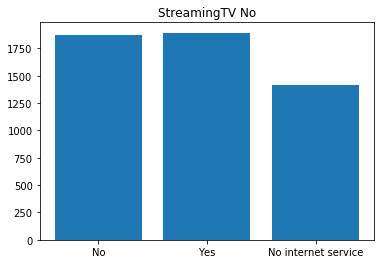

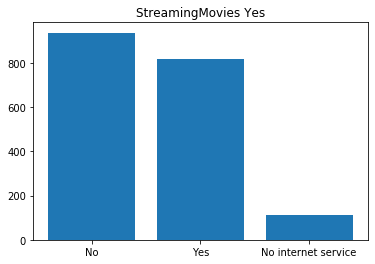

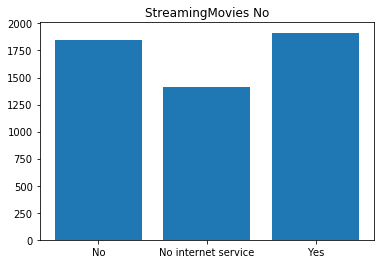

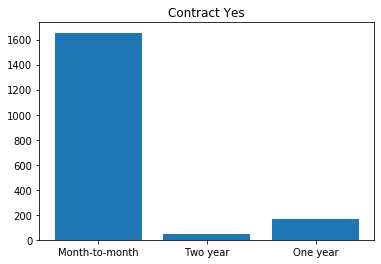

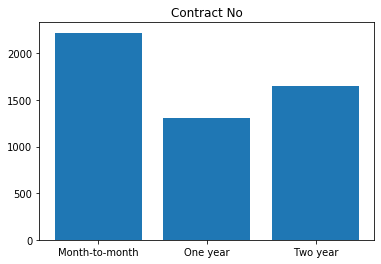

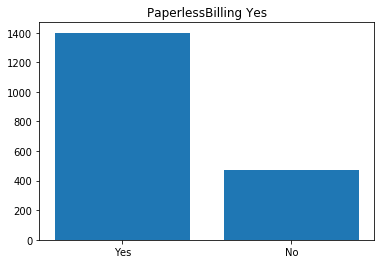

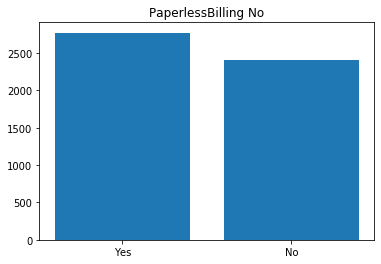

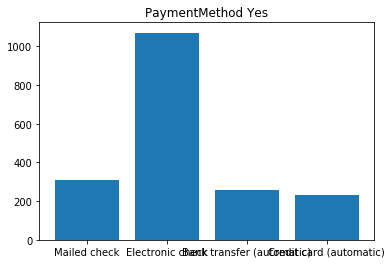

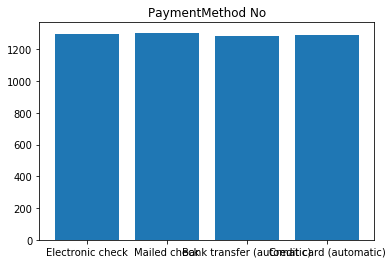

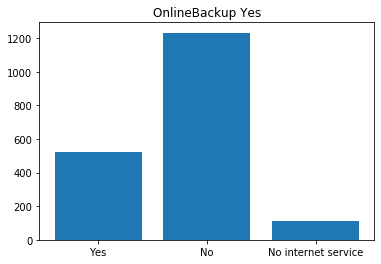

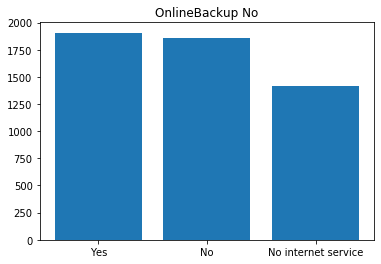

In [101]:

columns = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService","OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "OnlineBackup"]
column_dict = {}
combo_dict = {}
for name in columns:
    label_yes_count = {}
    label_no_count = {}
    length = len(df["Churn"])
    for num in range(length):
        if "Yes" == df["Churn"][num]:
            if df[name][num] not in label_yes_count:
                label_yes_count[df[name][num]] = 0
            label_yes_count[df[name][num]] += 1
        else:
            if df[name][num] not in label_no_count:
                label_no_count[df[name][num]] = 0
            label_no_count[df[name][num]] = label_no_count[df[name][num]] + 1 
    combo_dict[name] = (label_yes_count, label_no_count)   
for column in combo_dict.keys():
    (label_yes_count, label_no_count) = combo_dict[column]
    keys = label_yes_count.keys()
    length = range(len(keys))
    plt.bar(length, [label_yes_count[key] for key in keys])
    plt.xticks(length,keys)
    plt.title(column + " Yes")
    plt.show()
    keys = label_no_count.keys()
    length = range(len(keys))
    plt.bar(length, [label_no_count[key] for key in keys])
    plt.xticks(length, keys)
    plt.title(column + " No")
    plt.show()    

### Q3. (5 pts) Draw a heatmap of correlation matrix
- Use seaborn and visualize heatmap of correlation matrix for the three continuous features.

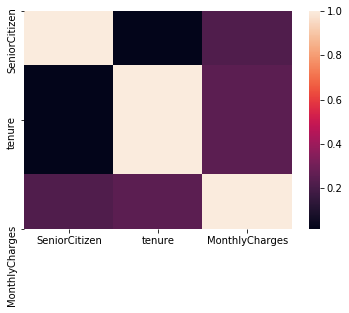

In [102]:
import seaborn as sns
sns.heatmap(df.corr())

## Part 2. Preparing a dataset

Let's preprocess the dataset for our analysis.

### Q4. (15 pts) Load the dataset into a dataframe and performs the one-hot encoding.

1. load the dataset into a dataframe. 
2. If there are any observations with missing values, report their number and remove them.
3. `Churn` column contains class labels (two distinct values `Yes` and `No`).
4. Use one-hot encoding to convert categorical features into numerical ones.    
5. When you apply the **one-hot encoding**, make sure that you **exclude** the first column (In the example below, this corresponds to the is\_DSL column).
6. For the three numerical variables, scale the features to ensure their values are in [0, 1]. Recall that we discussed the "feature scaling" in class.
     - The scaling maps the minumn and maximum values of each feature to 0 and 1, respectively.
     - You can manually implement this using a datframe's feature (e.g., `df.apply()`).
     - You can use `sklearn.preprocessing.MinMaxScaler`. **See** [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for details.
7. Encode your label column (i.e., `Churn`).
    - Map "No" to 0 and "Yes" to 1.
    - `sklearn.preprocessing.LabelEncoder` performs this mapping.
8. Print out the number of observations and features after the pre-processing.

Consider the InternetServics variable in your data. It is a cateorical variable with 3 distinct values: DSL, fiber optic, no. Let's encode the variable using the **one-hot** encoding we used in HW5. This time you can use the function implemented in `pandas` package. See the following example of applying the one-hot encoding to the InternetService variable.

| Internet Service |
|:------------:|
|  DSL         |
|  DSL         |
|  fiber optic         |
|  no         |

With one-hot encoding, this will be converted into 

| is_DSL | is_fiberOptic | is_No |
|:------:|:------:|:------:|
|   1    |   0    |    0   |
|   1    |   0    |    0   |
|   0    |   1    |    0   |
|   0    |   0    |    1   |.

Notice that a categorical variable with 3 distinct values is represented by a binary vector of length 3. In the previous homework, you manually applied the one-hot encoding. In this homework, you are allowed to use either `pandas.get_dummies()` or `sklearn.preprocessing.OneHotEncoder`. **PLEASE**, read the documentation pages ([get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) and [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)) for their usages and examples.


In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

noID = df.drop(columns='customerID')
dropIndex = []
for num in range(len(df['TotalCharges'])):
    if df["TotalCharges"][num] == " ":
        dropIndex.append(num)

f_df = noID.drop(dropIndex)

for column in columns: 
    dummies = pd.get_dummies(df[column])
    for col in dummies.columns:
        f_df[column + "_"  + col] = dummies[col]
        
f_df = f_df.drop(columns=columns)

numerics = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerics:
    numpycolumn = np.asarray(f_df[column]).reshape(-1, 1)
    X = MinMaxScaler()
    X.fit(numpycolumn)
    f_df[column] = X.transform(numpycolumn)

numeric_churn = []
for value in f_df['Churn']:
    if value == "Yes":
        numeric_churn.append(1)
    if value == "No":
        numeric_churn.append(0)
f_df['Churn'] = numeric_churn

As we talked in class, we can remove the bias term from the equation by adding a dummy column to the input dataset. In practice, we don't actually need to materialize this dummy column, but in here we will add it to keep the things simple. After adding a dummy column, you dataset will look like:
$$ \mathbf{X} = 
\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p} \\
1 & x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots  & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{np}
\end{pmatrix}
$$

### Q5. (5 pts) Augment the dataset by adding a dummy column of ones .

In [104]:

length = len(f_df['Churn'])
x = np.ones(length).astype(int).T
f_df["dummy"] = x

print(f_df.head())

   SeniorCitizen    tenure  ...  OnlineBackup_Yes  dummy
0              0  0.000000  ...                 1      1
1              0  0.464789  ...                 0      1
2              0  0.014085  ...                 1      1
3              0  0.619718  ...                 0      1
4              0  0.014085  ...                 0      1

[5 rows x 47 columns]


### Q6-1. (3 pts) Ensure that your dataset has $Y \in \{-1, +1 \}$ .

> Indented block


In simplified notation, it is assumed that $y_i \in \{-1, +1\}$. To satisf this assumption, we will **map <font color="red"> "No" to -1 and "Yes" to +1</font>**.
- Write a code that shows your y values indeed has domain of $\{-1, +1\}$.

In [105]:

new_churn =[]
for number in f_df['Churn']:
  if number != 1:
    new_churn.append(-1)
  else:
    new_churn.append(1)
f_df['Churn'] = new_churn
f_df['Churn'].unique()

array([-1,  1])

### Q6-2 (2pts) Split the data into train and test sets.
- Use `sklearn.model_selection.train_test_split()` function
- Use 80% of observations for training and the rest for testing.

In [0]:

from sklearn.model_selection import train_test_split

X_array = np.asarray(f_df.drop(columns="Churn"))
y = f_df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X_array, y, train_size=0.8)

## Part 3. Logistic Regression Model

Now we are ready to build our classfication model. In class, we have seen that logistic regression model tries to learn the conditional probability using a sigmoid function:
$$ \Pr[Y = y_i~|~X=x_i] = \sigma(y_i\beta^\intercal x_i) \quad \text{ for }i=1, \ldots, n\,, $$
where $\beta = (\beta_0, \beta_1, \ldots, \beta_p)^\intercal$.

The maximum likelihood principle sugguests minimizing the following *empirical logistic loss*:
$$ \underset{\mathbf{\beta} \in \mathbb{R}^{p+1}}{\text{minimize}}\, \mathbb{E}[\ell(\beta)] \approx \frac{1}{n}\sum_{i=1}^n \log (1 + \exp(-y_i\mathbf{\beta}^\intercal\mathbf{x}_i))\,, $$
and its gradient is given by
$$ \frac{\partial \ell(\mathbf{\beta})}{\partial \mathbf{\beta}} = \frac{1}{n}\sum_{i=1}^n (1 - \sigma(y_i\mathbf{\beta}^\intercal\mathbf{x}_i))y_i\mathbf{x}_i\,. \qquad\qquad (1) $$

One simple but powerful method you can use to solve the above optimization problem is **<font color="red">gradient descent</font>** algorithm. Starting from an inital solution $\beta^{(0)}$, it iteratively computes the *gradient* at the given location $\beta^{(k)}$ and updates the solution as follows:
$$\beta^{(k+1)} = \beta^{(k)} - \eta_k \nabla \ell(\beta^{(k)})\,,$$
where
- $\beta^{(k)}$ denotes the parameter vector at iteration $k$,
- $\eta_k > 0$ is the step size for iteration $k$, and 
- $\nabla \ell(\beta^{(k)})$ is the gradient of the objective function at $\beta^{(k)}$.


### Q7. (7 pts) Implement the objective function of logistic regression model.
- You will get the full mark on this question if you implement this without using a for-loop.

Given a numpy array $\beta$, the `logres_obj()` function should return 
$$ \frac{1}{n}\sum_{i=1}^n \log(1 + \exp(-y_i\beta^\intercal x_i))\,.$$

**<font color="red">Hint</font>**: let 
$$ W = \begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33} \\
w_{41} & w_{42} & w_{43} 
\end{pmatrix} \in \mathbb{R}^{4\times 3}\,,\quad q = \begin{pmatrix}
q_1 \\ q_2 \\ q_3 \\ q_4 \end{pmatrix} \in \mathbb{R}^{4\times 1}\,, \quad \text{ and } \alpha = 
\begin{pmatrix}
\alpha_1 \\ \alpha_2 \\ \alpha_3 
\end{pmatrix} \in \mathbb{R}^{3 \times 1}.$$
Then, we can compute $\sum_{i=1}^4 \alpha^\intercal w_i = \sum_{i=1}^4 w_i^\intercal \alpha$ as follows:
$$
\sum_{i=1}^4 \alpha^\intercal w_i 
= \text{np.sum}\left\{W \alpha\right\}
= \text{np.sum}\left\{
\begin{pmatrix}
\alpha^\intercal w_1 \\
\alpha^\intercal w_2 \\
\alpha^\intercal w_3 \\
\alpha^\intercal w_4 
\end{pmatrix} \right\}\,,
$$
where $w_i = (w_{i1}, w_{i2}, w_{i3})$, i.e, the $i^\mathrm{th}$ row. See the following example.

In [107]:
W = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
alpha = np.array([1, 2, 3])

q = np.array([1, 2, 3, 4])

sum_wa = np.sum(np.dot(W, alpha), axis=0)
print(sum_wa)

164


If you want to compute $\sum_{i=1}^4 \log(\alpha^\intercal w_i)$, you can do 
$$
\sum_{i=1}^4 \log\alpha^\intercal w_i 
= \text{np.sum}\left\{\text{np.log}(W \alpha)\right\}
= \text{np.sum}\left\{
\begin{pmatrix}
\log \alpha^\intercal w_1 \\
\log\alpha^\intercal w_2 \\
\log\alpha^\intercal w_3 \\
\log\alpha^\intercal w_4 
\end{pmatrix}, axis=0 \right\}\,,$$

In [108]:
log_wa = np.log(np.dot(W, alpha))
print(np.sum(log_wa, axis=0))

14.236323943019237


$$\sum_{i=1}^4 w_i q_i = \text{np.sum}\left\{ 
\begin{pmatrix}
q_1 \cdot w_1 \\
q_2 \cdot w_2 \\
q_3 \cdot w_3 \\
q_4 \cdot w_4 
\end{pmatrix}, axis=0\right\}\,.$$ Refer to the lecture slides on <font color="red">numpy array broadcasting</font>.

In [109]:
print("q.shape=", q.shape)
q2d = np.atleast_2d(q)
print("q2d.shape=", q2d.shape)
q2d = q2d.T
print("(after transpose) q2d.shape=", q2d.shape)
print(W * q2d)

q.shape= (4,)
q2d.shape= (1, 4)
(after transpose) q2d.shape= (4, 1)
[[ 1  2  3]
 [ 8 10 12]
 [21 24 27]
 [40 44 48]]


In [110]:
def logres_obj(X, y, beta):
    """
    returns the objective value of the logistic regression model
    -------
    obj: objective value (scalar)
    """ 
    length = len(filteredDf['Churn'])
    beta = beta.astype(float)
    betaT = np.asarray(beta)
    betaT_X = np.matmul(betaT, np.transpose(X))
    exponent = np.multiply(-np.asarray(y), betaT_X)
    expv = np.exp(exponent)
    logs = np.log(1 + expv)
    obj = (1 / length) * np.sum(logs)
    
    return obj

beta = np.zeros(X_train.shape[1])
print(logres_obj(X_train, y_train, beta))

beta = np.ones(X_train.shape[1])
print(logres_obj(X_train, y_train, beta))

0.5544586021970552
10.235396596132215


### Q8. (8 pts) Implement the function that returns the gradient of logistic regression model.
The `logres_grad()` function should return
$$\frac{1}{n}\sum_{i=1}^n (\sigma(y_i\mathbf{\beta}^\intercal\mathbf{x}_i)-1)y_i\mathbf{x}_i \,.$$

Note that the output is a gradient (1D numpy array of length $p+1$). 
- You should carefully distinguish vectors from scalars.
- Use the python's implementation of simoid function, `scipy.special.expit()` (check its documentation [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.expit.html))
- To help your implementation, a function you can use to numerically approximate the gradient is provided. See `finite_diff_grad()` function below.

In [0]:
def finite_diff_grad(X, y, beta, h=0.00001):
    """ 
    This function numerically evaluates the gradient of the objective function at beta
    """ 
    
    f_beta = logres_obj(X, y, beta)
    
    p = len(beta)
    grad = np.zeros(p)
    
    for i in range(p):
        e = np.zeros_like(beta)
        e[i] = h
        
        # evalute f(x+h)
        f_beta_h1 = logres_obj(X, y, beta+e)
        
        # evaluate f(x - h)
        f_beta_h2 = logres_obj(X, y, beta-e)
        
        grad[i] = (f_beta_h1 - f_beta_h2) / (2.0 * h)
        
    return grad

In [112]:
from scipy.special import expit


def logres_grad(X, y, beta):
    """
    returns the gradient of logistic regression model
    
    Parameters:
    ------------
    X, y: numpy arrays representing the input dataset
    beta: numpy array correspoinding to the parameter vector
    
    Output:
    -------
    grad: 1D numpy array
    """

    length = len(filteredDf['Churn'])
    beta = beta.astype(float)
    betaT = np.asarray(beta)
    betaT_X = np.matmul(betaT, np.transpose(X))
    y_betaT_X = np.multiply(np.asarray(y), betaT_X)
    sigmoid = np.asarray([expit(y_betaT_X)]).transpose()
    
    y_ = np.asarray([y]).transpose()
    sum = np.sum(np.multiply((sigmoid-1), np.multiply(y_, X)), axis=0)
    grad = (1 / length) * sum
    
    return grad 


# test code
"""
The outputs of two functions, logres_grad() and finite_diff_grad(), should be 
approximately the same.
"""
grad_analytic = logres_grad(X_array, y, beta)
grad_numeric = finite_diff_grad(X_array, y, beta)

print("L2 distance=", np.linalg.norm(grad_analytic - grad_numeric))

L2 distance= 6.269323383990949e-10


### Q9. (8 pts) Implment the Gradient Descent Algorithm
Using the two functions `logres_obj()` and `logres_grad()`, implement the gradient descent algorithm. The core of gradient descent algorithm is $$\beta^{(k+1)}=\beta^{(k)}-\eta\nabla f(\beta^{(k)})$$

1. Initialize the $\beta^{(0)} = (0, 0, \ldots, 0)^\intercal$.
2. Use the fixed step size $\eta$.

In [0]:
def grad_desc(X, y, n_iter=100):
    """
    gradient descent algorithm
    
    Parameters:
    ----------------
    X, y: input dataset
    n_iter: the number of iterations
                 
    Returns:
    -----------
    sol_path : a list of solutions, the kth entry corresponds to the beta 
               at iteration k
    obj_vals : a list of object values, the kth entry corresponds to the 
               objective value at iteration k               
    """
    sol_path = []
    obj_vals = []
     
    eta = 1.0

    n, p = X.shape
    
    beta = np.zeros(p)
    
    for i in range(n_iter):
        beta = beta - eta * logres_grad(X, y, beta)
        sol_path.append(beta)
        obj_vals.append(logres_obj(X, y, beta))

    return sol_path, obj_vals 

## Prediction
Recall that in logistic regression we set 
$$ \Pr(Y=1~|~X=x) = \sigma(\mathbf{\beta}^\intercal\mathbf{x}). $$
Our prediction will be
$$
Y = \begin{cases}
1 & \mbox{ if $\Pr[Y=1~|~X=x] \geq 0.5$} \\
-1 & \mbox{ otherwise.}
\end{cases}
$$
Since the sigmoid function $\sigma(x)$ is greater than or equal to 0.5 when $x\geq 0$ (refer to the figure below), we will predict $Y=1$ when $\mathrm{sign}(\beta^\intercal x)$ is positive.  

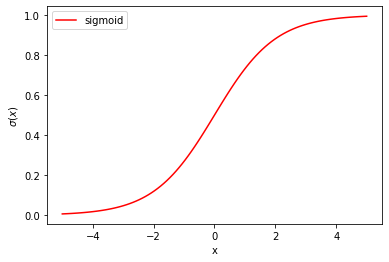

In [114]:
x = np.linspace(-5, 5, 100)
y = expit(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', label='sigmoid')
ax.set_xlabel('x')
ax.set_ylabel(r'$\sigma(x)$')
ax.legend()

### Q10. (7 pts) Implement a function that predicts the labels for the given examples.

In [0]:
def predict(X, beta):
    """
    predict the labels of observations in X
    
    Parameters:
    ----------------
    beta: coefficients
    X: 2D numpy array, a set of observations, an example per row
    
    Returns:
    y_hat: predicted labels    
    """
    signs = np.matmul(X, beta)
    y_hat = []
    for sign in signs:
        if sign > 0:
            y_hat.append(1)
        else:
            y_hat.append(0)
    y_hat = np.asarray(y_hat)
    return y_hat

## Part 4. Training
Now we're ready to train the logistic regression model using our implementation of gradient descent. Let's train a logistic regression model using the functions you implemented.

In [0]:
n_iter = 500
sols, objs = grad_desc(X_train, y_train, n_iter=n_iter)

We have 500 elements in the array `sols`, and each element is an estimate of $\beta$ (or solution) at iteration $k$. We can expect that the accuracy of $\beta$ improves as $k$ increases.

### Q11. (10 pts) Draw a plot showing how the objective values change as we do more gradient descent updates.
In other words, x-axis = iteration number $k$ and y-axis = objective value at iteration $k$.

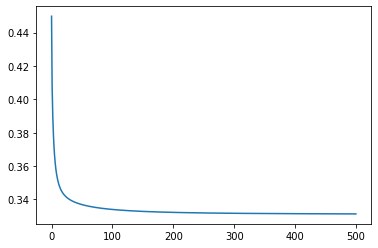

In [117]:

#-----------------------------#
#  Your code goes here        #
#-----------------------------#
x = np.linspace(0,500,500)
plt.plot(x, objs)
plt.show()

### Q12. (10 pts) Using the function `predict()` and estimates in `sols`, compute training and test errors (5 pts). 
- use 'red'solid line and 'blue' dotted line for training and testing, respectively.
- set the figsize=(10, 6.5)
- For your convenience, the code for computing the accuracies of solutions on the solution path is provided below.

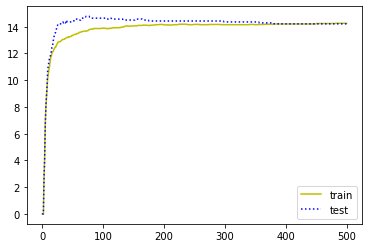

<Figure size 720x468 with 0 Axes>

In [118]:
def compute_accuracy(testX, testY, sols):
    """
    returns the accuracy of each solution on the given dataset
    
    accuracy = percentage of correctly classified examples
    
    Parameters
    -----------
    testX, testY: input dataset
    sols: a list of parameter vectors
    
    Returns
    --------
    acc: a list of accuracies, each element corresponds to the accuracy of each solution in sols
    """
    acc = []
    
    n_examples = len(testY)
    
    for sol in sols:  
        pred = predict(testX, sol)
        n_correct = n_examples - np.count_nonzero(testY - pred)
        acc.append((n_correct*100.0)/n_examples)
        
    return acc

train_accs = compute_accuracy(X_train, y_train, sols)
test_accs = compute_accuracy(X_test, y_test, sols)

# plot the training/test errors against iterations
# you need to have two series (or lines) in a single plot




plt.plot(x, train_accs, color="y", label = "train")
plt.plot(x, test_accs, color="b", linestyle='dotted', label = "test")
plt.legend(loc='lower right')
plt.figure(figsize=(10,6.5))
plt.show()

### Q13. (10 pts) Build a logistic regression model on the churn dataset using scikit-learn package.
- Report both training and testing accuracies

In [120]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
fit = logReg.fit(X_train, y_train)
Trainscore = logReg.score(X_train, y_train)
Testscore = logReg.score(X_test, y_test)
print("training accuracy = {}".format(Trainscore))
print("testing accuracy = {}".format(Testscore))

training accuracy = 0.8033777777777777
testing accuracy = 0.8073916133617626


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
